In [1]:
import ldpc
from ldpc import bp_decoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Cx = np.load("data/Cx_degree2.npz")
Cz = np.load("data/Cz_degree2.npz")

physical_error_rates = np.logspace(np.log10(0.001), np.log10(0.05), 10)
logical_error_rates = [[],[]]
H = Cx
runs = 10000
osd = True 
bp_method = 1 #1) "ps": product sum updates; 2) "ms": min-sum updates; 3) "msl": min-sum log updates

n = H.shape[1]

for i, H in enumerate([Cx, Cz]):
    for error_rate in physical_error_rates:
        bpd=ldpc.osd.bposd_decoder(H,error_rate=error_rate,max_iter=n,bp_method=bp_method) if osd else bp_decoder(H,error_rate=error_rate,max_iter=n,bp_method=bp_method)
        error=np.zeros(n).astype(int) #error vector

        num_logical_errors = 0
        for _ in range(runs):
            error = np.random.rand(n)
            error[error>=error_rate] = 0
            error[error>0] = 1

            syndrome=H@error %2 #calculates the error syndrome
            #print(f"Error: {error}")
            #print(f"Syndrome: {syndrome}")
            decoding=bpd.decode(syndrome)
            #print(f"Decoding: {error}\n")
            if np.abs(decoding-error).sum() != 0:
                num_logical_errors+=1

        logical_error_rate = num_logical_errors/runs
        logical_error_rates[i].append(logical_error_rate)

logical_error_rates_x = np.array(logical_error_rates[0])
logical_error_rates_z = np.array(logical_error_rates[1])

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_22284\604010012.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(physical_error_rates), np.log10(logical_error_rates_x), 'g', label="X error")


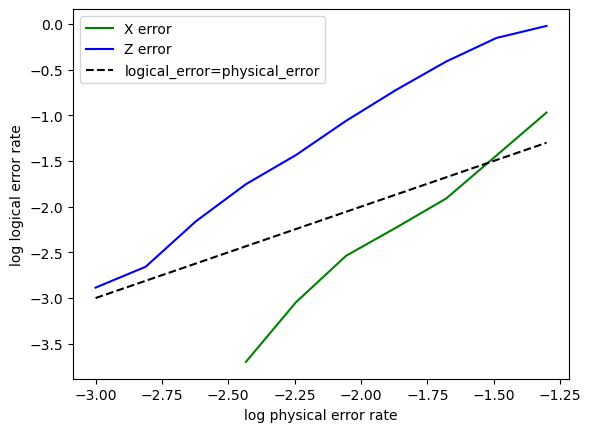

In [3]:
plt.plot(np.log10(physical_error_rates), np.log10(logical_error_rates_x), 'g', label="X error")
plt.plot(np.log10(physical_error_rates), np.log10(logical_error_rates_z), 'b', label="Z error")
plt.plot(np.log10(physical_error_rates), np.log10(physical_error_rates),linestyle="dashed", color="black", label='logical_error=physical_error')

plt.xlabel("log physical error rate")
plt.ylabel("log logical error rate")
plt.legend()
#plt.savefig("decoding_bp_osd.png")
plt.show()